In [1]:
# Load required libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import json
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, f1_score, precision_score
from sklearn.metrics import confusion_matrix

In [2]:
# READ DATA
df_train = pd.read_csv('./petfinder-adoption-prediction/final_train.csv')

In [3]:
############################################################################################
################################### DATA PREPARATION #######################################
############################################################################################

# Remove object data types from the data

df_train.drop(df_train.select_dtypes(['object']), axis=1, inplace=True)
#df_train.info()
#df_train.describe()

# Extract adoptionSpeed in a separate variable, remove it from the data set for model training/evaluation
df_train = df_train.dropna()
adoptionSpeed=df_train['AdoptionSpeed']
del df_train["AdoptionSpeed"]

#df_train.info()

In [4]:
# Separate the training data set into train dataset (80% train) and test dataset (20% test)
df_train, df_test, adoptionSpeed_train, adoptionSpeed_test = train_test_split(df_train, adoptionSpeed, test_size=0.2)

In [5]:
############################################################################################
################################## DATA NORMALIZATION ######################################
############################################################################################

# Normalize the data
# Train the scaler, which standarizes all the features by removing the mean and scaling to unit variance
sc = StandardScaler()
# Apply the scaler to the feature training data
sc.fit(df_train)

# Apply the SAME scaler to the feature test data
sc.fit(df_test)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [6]:
# Apply the scaler to the feature training data
features_train_std = sc.transform(df_train)

# Apply the SAME scaler to the feature test data
features_test_std = sc.transform(df_test)

In [7]:
############################################################################################
######################################## TRAIN #############################################
############################################################################################

# Create a multilayer perceptron object with the parameters: max 500 iterations (epochs) over the data ...
clf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(15,), random_state=1)
clf.fit(features_train_std, adoptionSpeed_train) 

MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(15,), learning_rate='constant',
              learning_rate_init=0.001, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=1, shuffle=True, solver='lbfgs', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [8]:
############################################################################################
######################################### TEST #############################################
############################################################################################

# Apply the trained perceptron on the features data to make predicts for the target test data
clf_predicted = clf.predict(features_test_std)
print(accuracy_score(adoptionSpeed_test, clf_predicted))
print(recall_score(adoptionSpeed_test, clf_predicted, average='macro'))
print(precision_score(adoptionSpeed_test, clf_predicted, average='macro'))
print(f1_score(adoptionSpeed_test, clf_predicted, average='macro'))

0.4
0.3169856812352975
0.31284755837367484
0.3061281461819574


In [9]:
# https://www.dataschool.io/simple-guide-to-confusion-matrix-terminology/

cm = confusion_matrix(adoptionSpeed_test, clf_predicted)

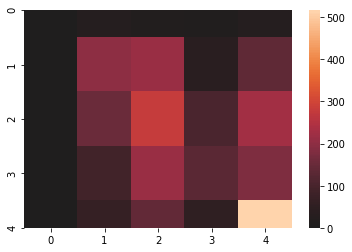

In [10]:
sns.heatmap(cm, center=True)
plt.show()

In [ ]:
# serialize model
from sklearn.externals import joblib
model_columns = list(features_train_std.columns)
joblib.dumps(model_columns, 'model_columns.pkl')

joblib.dump(clf, 'model.pkl')